In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [48]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [49]:
df.shape

(200, 5)

In [50]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [51]:
df.isnull().values.any()

False

In [52]:
df.isnull().sum().sum()

0

In [53]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [54]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [55]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


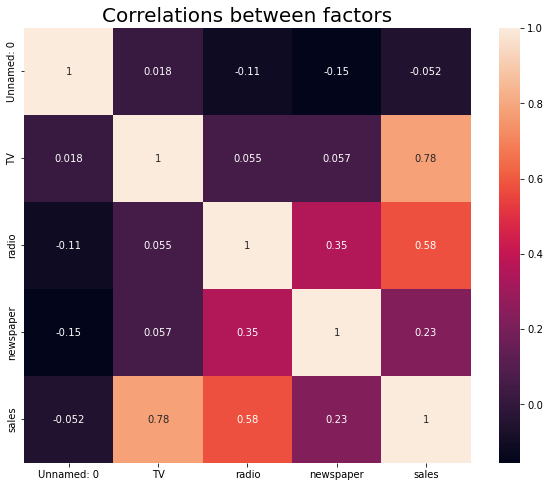

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

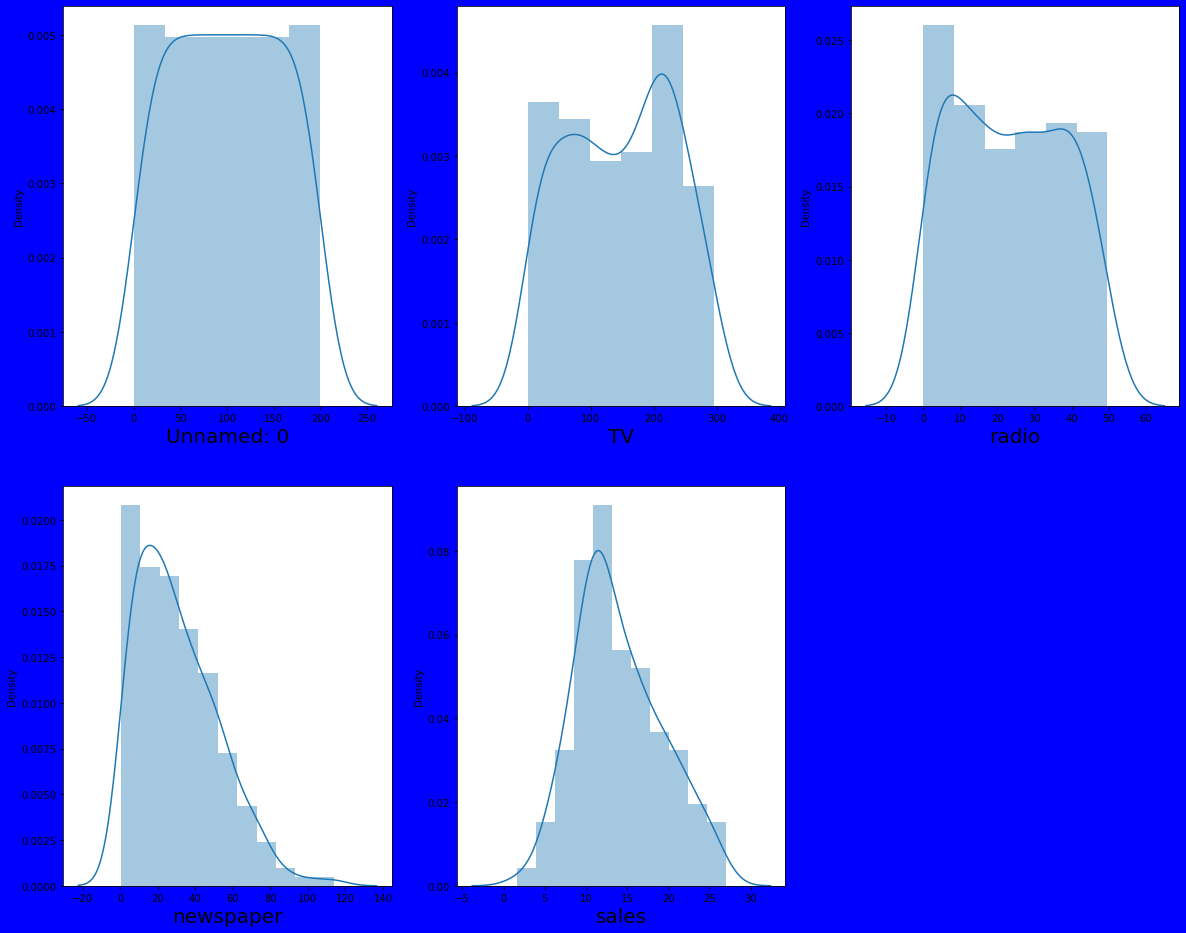

In [57]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [58]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


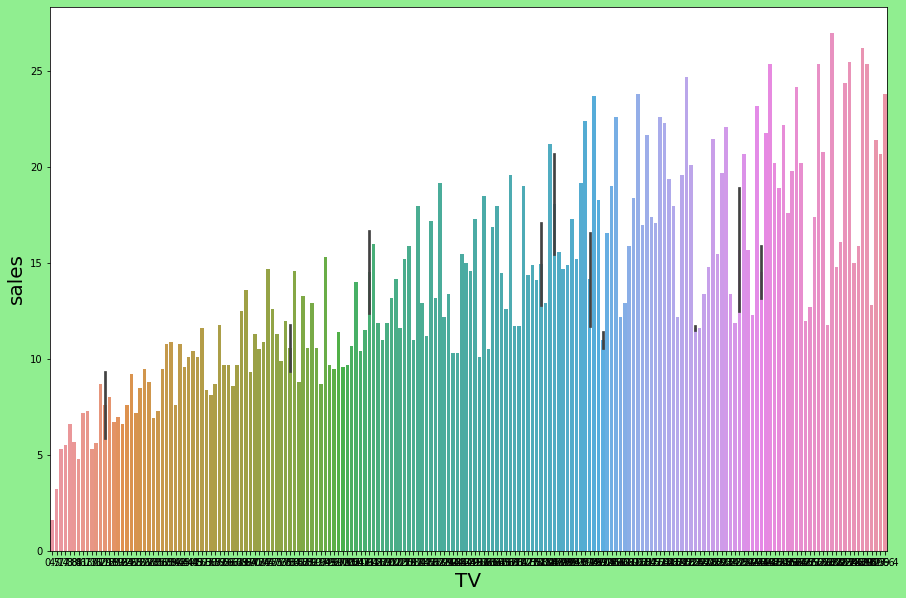

In [59]:
plt.figure(figsize=(15,10),facecolor='lightgreen')
sns.barplot(x='TV',y='sales',data=df)
plt.xlabel('TV',fontsize=20)
plt.ylabel('sales',fontsize=20)
plt.show()

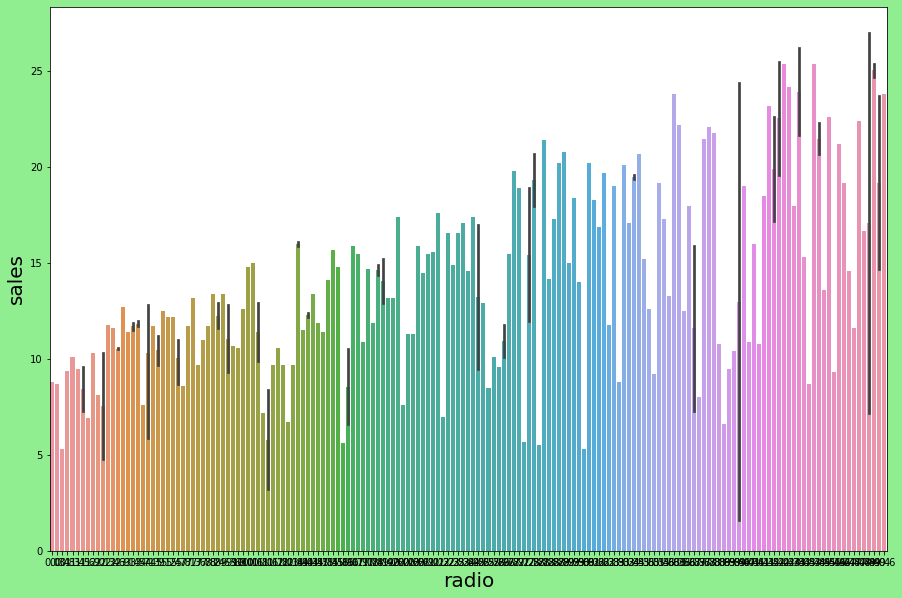

In [60]:
#lets visualize and analyse the data

plt.figure(figsize=(15,10),facecolor='lightgreen')
sns.barplot(x='radio',y='sales',data=df)
plt.xlabel('radio',fontsize=20)
plt.ylabel('sales',fontsize=20)
plt.show()

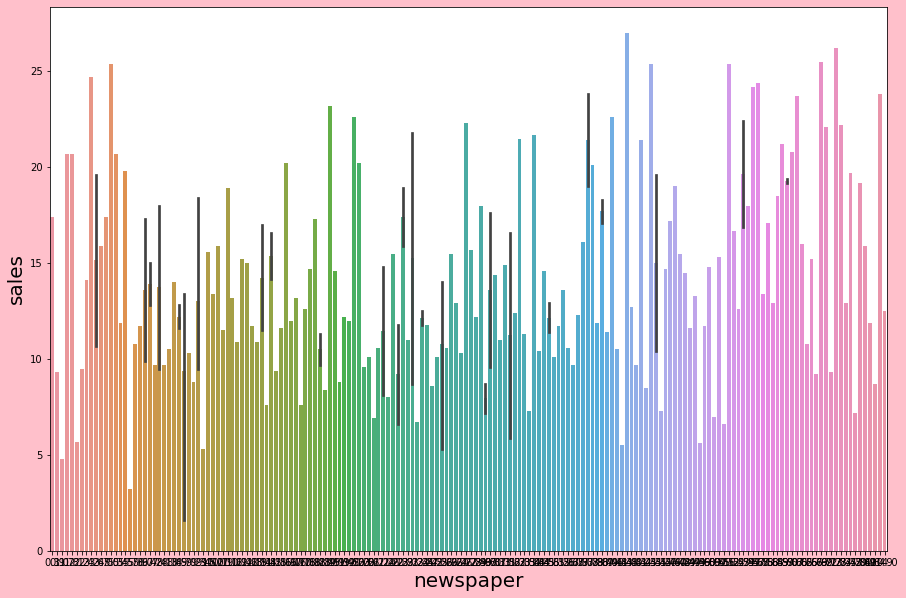

In [61]:
#lets visualize and analyse the data

plt.figure(figsize=(15,10),facecolor='pink')
sns.barplot(x='newspaper',y='sales',data=df)
plt.xlabel('newspaper',fontsize=20)
plt.ylabel('sales',fontsize=20)
plt.show()

In [62]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [63]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [64]:
y = df['sales']
X = df.drop(columns=['sales','Unnamed: 0'])

<AxesSubplot:>

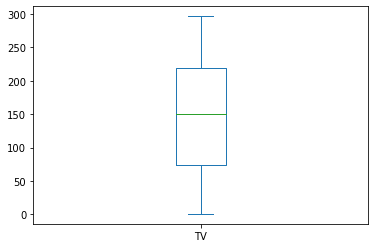

In [65]:
#lets see if their is any outlier by visualization 
X['TV'].plot.box()


<AxesSubplot:>

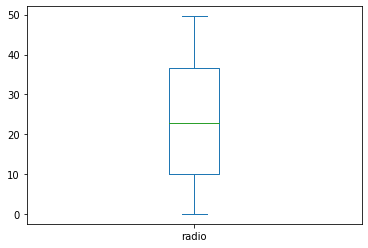

In [66]:
X['radio'].plot.box()

<AxesSubplot:>

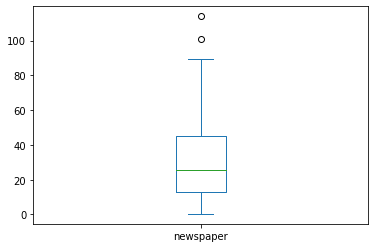

In [67]:
X['newspaper'].plot.box()

In [68]:
q1=df.quantile(0.25)

In [69]:
q3=df.quantile(0.75)

In [70]:
iqr=q3-q1

In [71]:
newsppr_high=(q3.newspaper + (1.5 * iqr.newspaper))

In [72]:
index = np.where(df['newspaper'] >newsppr_high)
index

(array([ 16, 101], dtype=int64),)

In [73]:
df = df.drop(df.index[index])
df.shape

(198, 5)

In [74]:
df.reset_index()

,index,Unnamed: 0,TV,radio,newspaper,sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
193,195,196,38.2,3.7,13.8,7.6
194,196,197,94.2,4.9,8.1,9.7
195,197,198,177.0,9.3,6.4,12.8
196,198,199,283.6,42.0,66.2,25.5


In [75]:
np.abs(3)

3

In [76]:
np.abs(-3)

3

In [77]:
from scipy.stats import zscore
(np.abs(zscore(X))<3).all()

TV            True
radio         True
newspaper    False
dtype: bool

In [78]:
y = df['sales']
X = df.drop(columns=['sales','Unnamed: 0'])

In [79]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [80]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [81]:
#Data scaling Z=(X-mean)/std

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [82]:
X_scaled.shape[1]

3

In [83]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.003863,TV
1,1.137887,radio
2,1.137631,newspaper


In [84]:
regression=LinearRegression()

In [85]:
for i in range(0,100):
    x_train,x_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    regression.fit(x_train,y_train)
    pred_train = regression.predict(x_train)
    pred_test= regression.predict(x_test)
    print(f"At random state{i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:-0.8898322019518987
At random state0,the testing accuracy is:-0.9098946359000558


At random state1,the training accuracy is:-0.8946050839431845
At random state1,the testing accuracy is:-0.8912199077372979


At random state2,the training accuracy is:-0.9105689646648081
At random state2,the testing accuracy is:-0.8381266733637571


At random state3,the training accuracy is:-0.8944143192604463
At random state3,the testing accuracy is:-0.8980994665131538


At random state4,the training accuracy is:-0.8981805823414822
At random state4,the testing accuracy is:-0.8719021920124682


At random state5,the training accuracy is:-0.8994368014551729
At random state5,the testing accuracy is:-0.8616494043950313


At random state6,the training accuracy is:-0.8993028842288798
At random state6,the testing accuracy is:-0.8760639888444908


At random state7,the training accuracy is:-0.8907422790206732
At random state7,the testing accuracy is:-0.9072259879826814




In [86]:
x_train.shape

(158, 3)

In [87]:
y_train.shape

(158,)

In [88]:
x_test.shape

(40, 3)

In [89]:
 x_train,x_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=24)
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [90]:
y_pred=regression.predict(x_test)
y_train.head()

5       7.2
180    10.5
173    11.7
187    17.3
110    13.4
Name: sales, dtype: float64

In [91]:
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [92]:
#since we already fit the data,now we can transform the data
print('SALES:',regression.predict(scaler.transform([[151.5,41.3,58.5]])))

SALES: [17.41891269]


In [93]:
#Adjusted R2 score
regression.score(x_train,y_train)

0.8809757910723603

In [94]:
regression.score(x_test,y_test)

0.9456025807476978

In [95]:
#lets plot and visualize
y_pred=regression.predict(x_test)
y_pred

array([ 4.29631103, 21.07825712, 14.66962503,  6.49887728,  7.99693811,
        8.08014969, 21.47487973, 12.50227763, 14.07771522,  9.9194312 ,
        9.73536364, 18.95497735, 18.27863216, 14.94674356, 15.20926803,
       20.29458854, 16.93859556, 17.64454479, 21.12699275, 20.29604971,
        7.52950218, 20.6940919 , 17.9052949 ,  9.53162246, 17.34547341,
       14.91945382, 18.4108073 , 19.19501887, 23.90716484, 17.25862501,
       19.70672362,  9.86063768,  9.54244391, 10.311802  , 10.04353497,
       15.44884444, 14.82865231,  7.29019261,  7.80120291, 11.85249272])

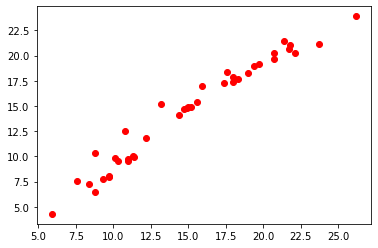

In [96]:
plt.scatter(y_test,y_pred,color='r')
plt.xlabel='actual salary'
plt.ylabel='Predicted salary'
plt.title='Actual vs model predicted '
plt.show()

In [97]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [98]:
 mean_squared_error(y_test,y_pred)

1.3997404528615582

In [99]:
mean_absolute_error(y_test,y_pred)

0.9447865127960526

In [100]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.1831062728519186

In [101]:
#regularization to chk whether model is overfitting or not

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [102]:
lasscv = LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [103]:
alpha =lasscv.alpha_
alpha

0.005855336049237517

In [104]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.005855336049237517)

In [105]:
lasso_reg.score(x_test,y_test)

0.9458312978306809

In [106]:
#RidgeCV
ridgecv =RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [107]:

ridgecv.alpha_

0.001

In [108]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [109]:
ridge_model.score(x_test,y_test)

0.945602818863763

In [110]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(ridge_model,X,y,cv=5)
print("cross validation score of linear regression model:",scr1.mean())

cross validation score of linear regression model: 0.8853605762229637


In [111]:
scr1

array([0.87988273, 0.9176965 , 0.92510819, 0.80845814, 0.89565732])

In [112]:
from sklearn.model_selection import cross_val_score

scr2=cross_val_score(ridge_model,X,y,cv=5)
print("cross validation score of ridge model:",scr2.mean())

cross validation score of ridge model: 0.8853605762229637


In [113]:
from sklearn.model_selection import cross_val_score

scr3=cross_val_score(lasso_reg,X,y,cv=5)
print("cross validation score of lasso model:",scr3.mean())

cross validation score of lasso model: 0.8853705439500825


In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters ={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
abc=GridSearchCV(rf,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [115]:
rf=RandomForestRegressor(criterion= 'mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred=rf.predict(x_test)
rfs=r2_score(y_test,y_pred)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

R2 score: 98.14787649204692
cross val score: 97.6075221199585


In [116]:
from sklearn.tree import DecisionTreeRegressor
parameters ={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
dt=DecisionTreeRegressor()
abc=GridSearchCV(rf,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [117]:
dt=DecisionTreeRegressor(criterion= 'mae',max_features='auto')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
y_pred=dt.predict(x_test)
dtr=r2_score(y_test,y_pred)
print('R2 score:',dtr*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtr=dtscore.mean()
print('cross val score:',dtr*100)

R2 score: 97.14263437743118
cross val score: 94.44188663561958


In [118]:
!pip install xgboost

In [119]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
parameters={"colsample_bytree": [0.7, 0.3],
    "gamma": [0, 0.5],
    "learning_rate": [0.03, 0.3], 
    "max_depth": [2, 6],
    "n_estimators": [100, 150],
    "subsample": [0.6, 0.4]}
xg=XGBRegressor()
abc=GridSearchCV(xg,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)

{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.4}


In [123]:
model=XGBRegressor(colsample_bytree=0.7, gamma =0, learning_rate=0.3, max_depth=2, n_estimators=150, subsample=0.4)
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred=model.predict(x_test)
model_score=r2_score(y_test,y_pred)
print('R2 score:',model_score*100)

modelscore=cross_val_score(xg,X,y,cv=5)
xgr=modelscore.mean()
print('cross val score:',xgr*100)

R2 score: 98.75559250842711
cross val score: 96.90907247774507


In [ ]:
#so as we can see xgboost regressor is giving best accuracy....so we will select this model

In [125]:
#saving the model to local file system
filename='salesprediction.pickle'
pickle.dump(regression,open(filename,'wb'))


In [ ]:
.....#..........................................................THANKS.......................................................................